# Logistic Regression

In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df_woe = pd.read_csv('train_df_woe.csv',index_col=0)
test_df_woe = pd.read_csv('test_df_woe.csv',index_col=0)

In [3]:
train_df_bin = pd.read_csv('train_bins.csv',index_col=0)

In [4]:
train_df_woe

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,-0.118354,-0.196854,-0.169132,0.313932,0.017421,-0.172265,0.246091,-0.220279,0
1,1.406714,-0.196854,-0.169132,0.313932,0.017421,-0.464852,0.246091,0.578976,0
2,-0.118354,-0.196854,-0.169132,0.313932,0.017421,-0.464852,0.246091,-0.220279,0
3,1.406714,-0.196854,-0.169132,0.313932,0.017421,-0.464852,0.246091,-0.220279,0
4,-0.118354,1.044858,-0.169132,0.313932,0.017421,1.163205,0.246091,-0.220279,1
...,...,...,...,...,...,...,...,...,...
4082,-3.307107,-0.196854,-0.169132,-1.103560,-2.653533,-0.172265,-2.849866,-0.220279,0
4083,-0.118354,1.044858,-0.169132,0.313932,0.017421,1.163205,0.246091,-0.220279,0
4084,-0.118354,-0.196854,-0.169132,0.313932,0.017421,-0.464852,0.246091,-0.220279,0
4085,-0.118354,-0.196854,1.432768,0.313932,0.602668,1.163205,0.246091,-0.220279,0


In [5]:
lr = LogisticRegression(class_weight='balanced')

In [6]:
X_train = train_df_woe.drop('stroke',axis=1)
y_train = train_df_woe['stroke']

X_test = test_df_woe.drop('stroke',axis=1)
y_test = test_df_woe['stroke']
lr.fit(X_train,y_train,)

LogisticRegression(class_weight='balanced')

In [7]:
preds = lr.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
print(accuracy_score(y_test,preds))

0.7671232876712328


In [10]:
print(confusion_matrix(y_test,preds))

[[744 224]
 [ 14  40]]


In [11]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86       968
           1       0.15      0.74      0.25        54

    accuracy                           0.77      1022
   macro avg       0.57      0.75      0.56      1022
weighted avg       0.94      0.77      0.83      1022



##### The model gives a lot of false positives but it has a high recall meaning it catches a lot of strokes even if many of them are false positives, considering we are trying to predict a potentially life threateaning condition I think it is a good trade off.

### AUC and ROC, they are better metrics for highly imbalanced datasets such as these one

AUC: 0.8353


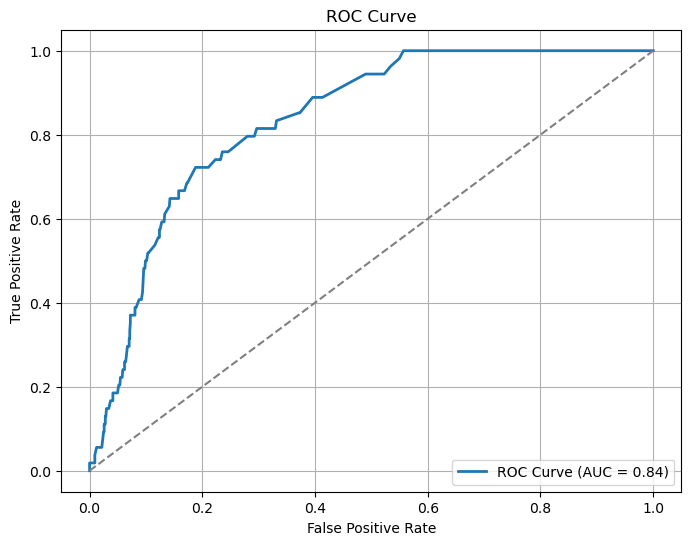

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = lr.predict_proba(X_test)[:, 1]  # get proba for class 1
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

print(f"AUC: {auc_score:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

##### Choosing best threshold based on Youden's metric which balances sensitivity and specifity so the precision can get increased slightly while still keeping high recall.

In [13]:
j_scores = tpr - fpr
best_threshold = thresholds[np.argmax(j_scores)]
print(f"Best threshold: {best_threshold:.4f}")

Best threshold: 0.5728


In [14]:
y_proba = lr.predict_proba(X_test)[:, 1] 
y_pred_best = (y_proba >= best_threshold).astype(int)

In [15]:
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89       968
           1       0.18      0.72      0.28        54

    accuracy                           0.81      1022
   macro avg       0.58      0.77      0.59      1022
weighted avg       0.94      0.81      0.86      1022



These are pretty good results, the model achieved a good recall which is the more imporatant metric in this case while changing the treshold helped slightly with the low precision score.

In [16]:
coefficients = lr.coef_[0]
features = X_train.columns

coef_df = pd.DataFrame({
    'Variable': features,
    'Coefficient': coefficients
})

print(coef_df)

            Variable  Coefficient
0                age     0.983156
1       hypertension     0.285413
2      heart_disease     0.353061
3       ever_married    -0.180954
4          work_type    -0.392294
5  avg_glucose_level     0.517462
6                bmi     0.519046
7     smoking_status     0.574960


In [40]:
df_excel = pd.read_excel('woe_all_variables.xlsx')

In [41]:
df_excel[['Variable', 'Bin', 'WoE']]

,Variable,Bin,WoE
0,gender,['Female'],0.033376
1,gender,['Male'],-0.044915
2,age,"(-inf, 37.50)",3.307107
3,age,"[37.50, 67.50)",0.118354
4,age,"[67.50, inf)",-1.406714
5,hypertension,[0],0.196854
6,hypertension,[1],-1.044858
7,heart_disease,[0],0.169132
8,heart_disease,[1],-1.432768
9,ever_married,['No'],1.103560


### Interpretations based on coefficients and bins from excel file
1. Higher age groups are at a much greater risk of stroke
2. Hypertension increases the risk of stroke
3. heart disease increases the risk of stroke
4. People who where at any point in their lives married have a lower risk of stroke
5. Self employed people had the highest risk while children and never working people had the lowest
6. Higher risk with higher glucose levels
7. Higher risk for people with higher BMI
8. People who have smoked at any point in their lives have a higher risk, while former smokers where at the highest risk

Log reg most important metrics
1. AUC = 0.8353
2. TPR = 0.72
3. Macro avg precision = 0.58
4. Macro avg recall = 0.77
5. Macro avg f1 = 0.59